## How to use Tessellate

The following is a small tutorial for Tessellate usage, including how to start a 'tessellation' run and how to look at results.

To start with, we will import the 'Tessellate' class. This is the parent class for commencing a run. The only required things to be input are: 
- __data_path__ : the path to where TESS data is / will be stored.
- __job_output_path__ : the path to where OzStar / slurm output logs will be stored.
- __working_path__ : the current working directory, where necessary scripts will be generated for the run.

Following this, a series of user inputs will be recorded to fill out the required information (see below). Alternatively, each of these can be fed as inputs into the initialisation with the path variables above.


In [1]:
from tessellate import Tessellate

data_path = '/fred/oz100/TESSdata'              # Path to where TESS data is/will be stored
job_log_path = '/path/to/joblog/directory'      # Path to where job logs will be outputted
working_path = '/path/to/working/directory'     # Path to current working directory, will generate scripts here

run = Tessellate(data_path=data_path,job_output_path=job_log_path,working_path=working_path)

`----------Initialising Tessellation Run----------`

   `- Sector = 1`  
   `- Cam [1,2,3,4,all] = all`  
   `- CCD [1,2,3,4,all] = all`

The first block of inputs outline the key run properties (TESS Sector, Camera, CCD). Selecting 'all' for either __cam__ or __ccd__ will result in a loop over all 16 CCDs in the provided sector. Note that sectors cannot be looped over (as of yet).

`   - Download FFIs? [y/n] = y`  
`   - Make Cube(s)? [y/n] = y`  
`   - Make Cut(s)? [y/n] = y`  
`   - Reduce Cut(s)? [y/n] = y`  
`   - Run Transient Search on Cut(s)? [y/n] = y`

The second block of inputs ask which of the five tessellation steps (Downloading, Cubing, Cutting, Reducing, Searching) are to be conducted. 

`   - Download Number = all`  
`   - n (Number of Cuts = n^2) = 4`  
`   - Cut [1-16,all] = all`

The __Download Number__ input specifies how many FFIs are to be download. The __n__ input specifies how many cuts the data is to be split into (n^2 are made). The __cut__ input can be a number between 1 and __n__^2 , or 'all'. If it is a number, only that cut will be operated upon. 

`- Cube Batch Time ['h:mm:ss'] (45:00 suggested) = 45:00`  
`- Cube Mem/CPU (20G suggested) = 20`  
`   - Cube Num CPUs Needed = 3`

`- Cut Batch Time ['h:mm:ss'] (10:00 suggested) = 10:00`  
   `- Cut Mem/CPU (20G suggested) = 20`  
   `- Cut Num CPUs Needed = 1`

 `  - Reduce Batch Time ['h:mm:ss'] (1:00:00 suggested) = 1:00:00`  
  ` - Reduce Num CPUs [1-32] (32 suggested) = 32`   
 `  - Reduce Mem/CPU Needed = 2`  

 `  - Search Batch Time ['h:mm:ss'] (5:00 suggested) = 5:00`  
 `  - Search Num CPUs [1-32] (32 suggested) = 32`  
 `  - Search Mem/CPU Needed = 1`  

The remaining inputs deal with the specifics for submitting slurm jobs to the supercomputer. The __Batch Time__ is the max allocated time for a job. __Mem/CPU__ is memory allocation per CPU usage. Behind the scenes, total memory allocation is locked based on experimentation, and impacts the __Num CPUs__ input. For example, if the total memory required for a cubing job requires 60 GB, and __Mem/CPU__ is 20 (GB), then __Num CPUs__ will automatically lock to 3. This can be changed either by feeding custom inputs into the initialisation of the __Tessellation__ object, or when a custom number of FFIs is downloaded.

## The Tessellation run will now begin.

Data is stored in the following way:

>`data_path/`   
>> `├── Sector1`  
>> `├── ...`  
>> `└── Sector62`  
>>> `├── Cam1`  
>>> `├── ...`  
>>> `└── Cam4`  
>>>> `├── Ccd1`  
>>>> `├── ...`  
>>>> `└── Ccd4` 
>>>>> `├── Cut1of16`  
>>>>> `├── ...`  
>>>>> `└── Ccd16of16`
>>>>>> `├── sector62_cam4_ccd4_cut16_of16_ReducedFlux.fits`  
>>>>>> `├── sector62_cam4_ccd4_cut16_of16_Mask.fits`  
>>>>>> `├── sector62_cam4_ccd4_cut16_of16_Times.fits`  
>>>>>> `└── detected_sources.csv`  

There are other files inside the "Cut16of16" subdirectory, but these four are the only ones that matter at the end of the run. These are the ones required for transient event analysis should the analysis be conducted externally to the Swinburne servers.

## Transient Event Search

Upon completion, import a second class, __Detector__.

In [11]:
from tessellate import Detector

data_path = '/fred/oz100/TESSdata'
sector = 29
camera = 2
ccd = 4
n = 4

detector = Detector(sector=sector,cam=camera,ccd=ccd,n=n,data_path=data_path)

To look at the results of a particular cut, use `plot_results()`. The left panel represents the detections (dot colour denotes time through sector) with respect to a frame in the sector, and the right panel shows the same overlaid on the source mask of the cut.

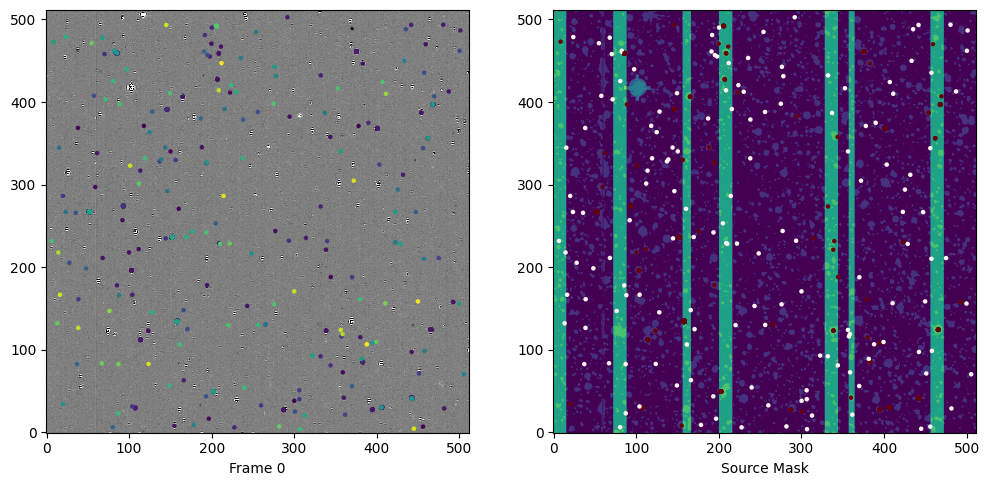

In [12]:
detector.plot_results(cut=6)

The `count_detections()` function prints out the ID of each clustered event alongside how many detections are made. Optional inputs of `lower=int` and `upper=int` apply lower and upper detection number limits to returned events.

In [14]:
print(detector.count_detections(cut=6))
print(detector.count_detections(cut=6,lower=7,upper=20))

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 16, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 2, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 3, 90: 2, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 3, 136: 1, 137: 1, 138: 1, 13

To look at the lightcurve of an individual event, run the `plot_source()` function. A pandas DataFrame is also returned which contains information for each detection in the event. Most are self explanatory - for source_mask, a 0 indicates the event is not associated with a masked star (could still be a star), and anything higher means a masked star association.

,Unnamed: 0,xcentroid,ycentroid,fwhm,roundness,pa,max_value,flux,mag,frame,psflike,psfdiff,xint,yint,objid,source_mask,n_detections,ra,dec,mjd
1736,394,205.895137,492.148289,3.862618,0.182860,147.155789,50.856030,215.326107,-5.832742,2588,0.99,0.178247,206,492,28,1,16,359.039495,-39.599604,59106.820802
1737,387,206.125813,492.039274,2.814672,0.192061,137.376199,174.177586,639.943799,-7.015355,2589,0.99,0.151544,206,492,28,1,16,359.037617,-39.599630,59106.827746
1738,375,206.032825,492.051772,3.216063,0.275828,141.323569,119.478173,449.361338,-6.631489,2590,0.99,0.149714,206,492,28,1,16,359.038276,-39.599458,59106.834691
1739,394,206.021529,491.982584,3.623030,0.257378,134.848349,74.767215,303.502154,-6.205404,2591,0.99,0.178432,206,492,28,1,16,359.038137,-39.599074,59106.841635
1740,394,205.880365,492.049239,3.616953,0.214878,146.275053,52.310895,214.926305,-5.830724,2592,0.99,0.185092,206,492,28,1,16,359.039286,-39.599058,59106.848579
1741,381,205.856676,492.055107,3.995447,0.362228,141.758462,43.941603,194.098441,-5.720055,2593,0.99,0.169936,206,492,28,1,16,359.039462,-39.599028,59106.855524
1742,372,205.758994,491.989119,4.071262,0.329367,140.797053,37.544833,174.480509,-5.604367,2594,0.99,0.177559,206,492,28,1,16,359.039909,-39.598441,59106.862468
1743,404,205.898738,492.047124,4.002282,0.244144,148.941879,35.983840,166.362183,-5.552637,2595,0.99,0.159871,206,492,28,1,16,359.039157,-39.599094,59106.869412
1744,401,205.748433,492.111954,4.162869,0.316871,144.316960,31.753949,151.898535,-5.453884,2596,0.99,0.197256,206,492,28,1,16,359.040361,-39.599045,59106.876357
1745,396,205.550940,492.126161,4.637070,0.302635,141.440692,26.465880,141.816264,-5.379315,2597,0.98,0.218486,206,492,28,1,16,359.041724,-39.598617,59106.883301


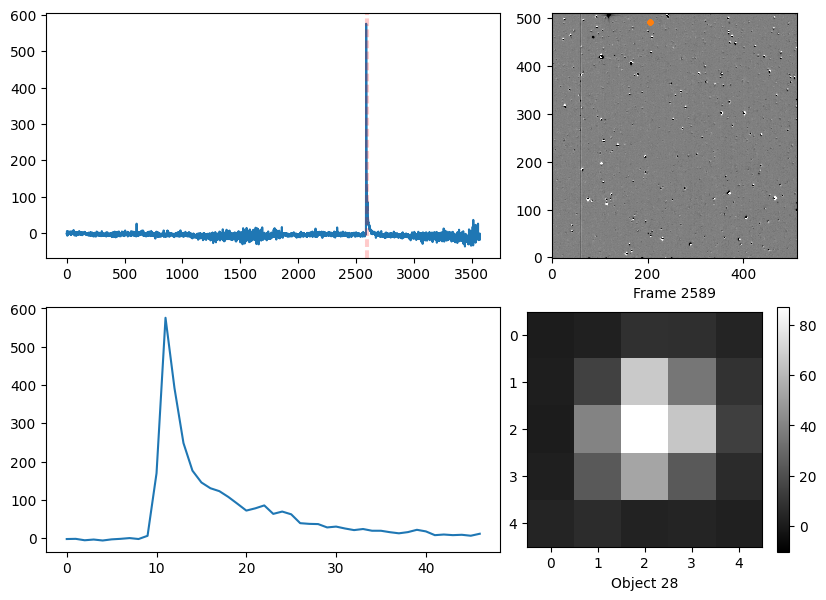

In [16]:
detector.plot_source(cut=6,id=28)  # Just an M-Dwarf Flare ;)

Finally, run `full_ccd()` to get a complete view of the full CCD detections. This can be run even if some cuts are incomplete. Cut 1 is the bottom left, and cuts increase horizontally upwards, so cut 16 is the top right.

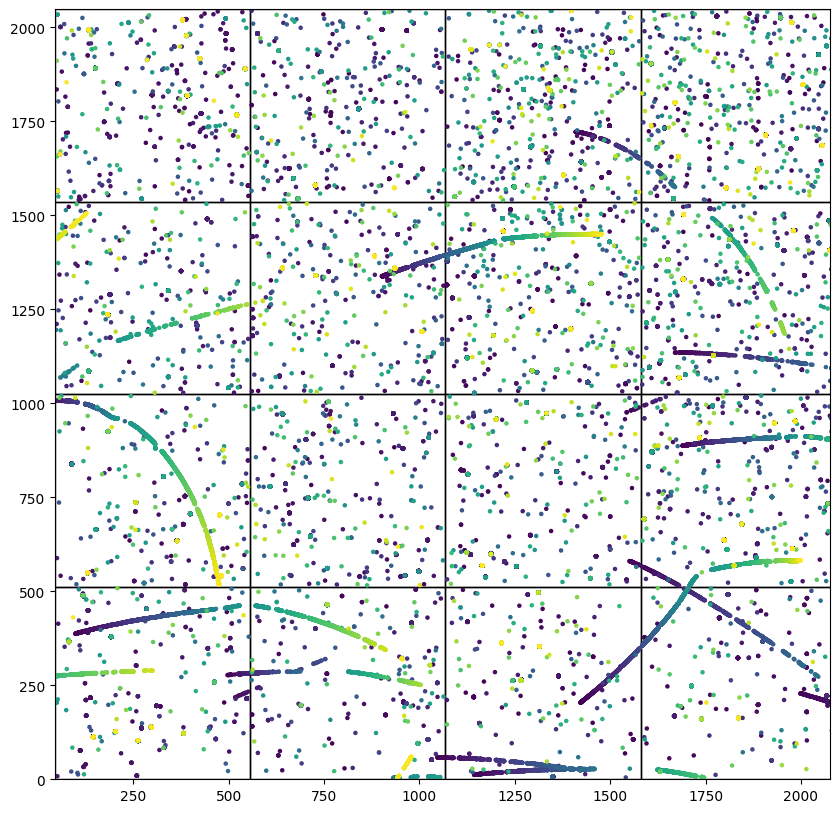

In [17]:
detector.full_ccd()